# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [11]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "Output/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [13]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


610

In [14]:
#Create a dataframe to store the data
city_weather = pd.DataFrame({'City': cities, 'Lat': "", 'Lng': "",'Max Temp': "",
                             'Humidity': "",'Cloudiness': "", 'Windspeed': "",
                             'Country': "",'Date': ""})

#Preview the dataframe
city_weather.head(100)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Windspeed,Country,Date
0,lorengau,,,,,,,,
1,broken hill,,,,,,,,
2,avarua,,,,,,,,
3,kokopo,,,,,,,,
4,cape town,,,,,,,,
...,...,...,...,...,...,...,...,...,...
95,lerwick,,,,,,,,
96,manbij,,,,,,,,
97,lubango,,,,,,,,
98,shimoda,,,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [15]:

#Variable to keep track of response number
record_num = 1


# Save config information.
url = 'http://api.openweathermap.org/data/2.5/weather?'

# Print Log opening statement

print(f'Beginning Data Retrieval')
print(f'-------------------------------')

# Loop through cities in city list and run API calls
for index, row in city_weather.iterrows():
    
    # Build query URL
    query_url = url + 'appid=' + weather_api_key + '&q=' + row['City'] 
#     print(f'{query_url}')
    # Get weather data
    response = requests.get(query_url).json()
 
    #Try to access key that doesn't exist
    try:
        print(f'Processing Record {record_num} | {response["name"]}')
        city_weather.loc[index, 'Cloudiness'] = response['clouds']['all']
        city_weather.loc[index, 'Country'] = response['sys']['country']
        city_weather.loc[index, 'Date'] = response['dt']
        city_weather.loc[index, 'Humidity'] = response['main']['humidity']
        city_weather.loc[index, 'Lat'] = response['coord']['lat']
        city_weather.loc[index, 'Lng'] = response['coord']['lon']
        city_weather.loc[index, 'Max Temp'] = response['main']['temp_max']
        city_weather.loc[index, 'Windspeed'] = response['wind']['speed']
        
        #Increase the record count
        record_num += 1
        
#      # If no record found "skip" to next call
    except KeyError:
        print(f'City not found. Skipping...')
        
print(f'-----------------------\nData Retrieval Complete\n--------------------')

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Lorengau
Processing Record 2 | Broken Hill
Processing Record 3 | Avarua
Processing Record 4 | Kokopo
Processing Record 5 | Cape Town
Processing Record 6 | Mbamba
Processing Record 7 | Hermanus
Processing Record 8 | Natal
Processing Record 9 | Leningradskiy
Processing Record 10 | Nome
Processing Record 11 | Kiryat Gat
Processing Record 12 | Ushuaia
City not found. Skipping...
Processing Record 13 | Mount Isa
Processing Record 14 | Yellowknife
City not found. Skipping...
City not found. Skipping...
Processing Record 15 | Saldanha
Processing Record 16 | Rikitea
Processing Record 17 | Katsuura
Processing Record 18 | Puerto Ayora
Processing Record 19 | Santiago del Estero
City not found. Skipping...
Processing Record 20 | Ponta Delgada
Processing Record 21 | Araouane
Processing Record 22 | Saint-Philippe
City not found. Skipping...
Processing Record 23 | Isangel
Processing Record 24 | Port-Cartier
Processing Reco

Processing Record 235 | Kosonsoy
City not found. Skipping...
Processing Record 236 | Reconquista
Processing Record 237 | Srednekolymsk
Processing Record 238 | Pangkalanbuun
Processing Record 239 | Khovd
Processing Record 240 | Gaya
Processing Record 241 | Smithers
Processing Record 242 | Ternuvate
Processing Record 243 | Yumen
Processing Record 244 | Fairbanks
Processing Record 245 | Mollendo
Processing Record 246 | Port Elizabeth
Processing Record 247 | Bethel
Processing Record 248 | Makkah al Mukarramah
Processing Record 249 | Hoquiam
Processing Record 250 | Mossamedes
Processing Record 251 | Butgenbach
Processing Record 252 | Kingsport
Processing Record 253 | Henties Bay
Processing Record 254 | Kaitangata
City not found. Skipping...
City not found. Skipping...
Processing Record 255 | Sterling
Processing Record 256 | Ouésso
Processing Record 257 | Mattru
Processing Record 258 | Saraland
Processing Record 259 | Benguela
Processing Record 260 | Yulara
Processing Record 261 | Kavieng
Pr

City not found. Skipping...
Processing Record 467 | Tuatapere
Processing Record 468 | Kyaikkami
Processing Record 469 | Dunedin
Processing Record 470 | Iquique
Processing Record 471 | Maniitsoq
Processing Record 472 | Mazarrón
Processing Record 473 | Keetmanshoop
Processing Record 474 | Hūn
Processing Record 475 | Ballina
Processing Record 476 | Pizarro
Processing Record 477 | Torres
Processing Record 478 | Oussouye
City not found. Skipping...
Processing Record 479 | Rome
City not found. Skipping...
City not found. Skipping...
Processing Record 480 | San Nicolas
City not found. Skipping...
Processing Record 481 | Inuvik
Processing Record 482 | Wau
Processing Record 483 | Izvoru Crişului
Processing Record 484 | Zambezi
Processing Record 485 | Pangoa
Processing Record 486 | Half Moon Bay
Processing Record 487 | Laguna
Processing Record 488 | Tieling
Processing Record 489 | Sobolevo
Processing Record 490 | Paternion
Processing Record 491 | Dauphin
Processing Record 492 | Dano
Processing R

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [46]:
# Clean dataframe to remove cities that were not found
# city_weather = city_weather.replace('', np.nan)
# city_weather = city_weather.dropna()

#Save dataframe
city_weather.to_csv("../Output/City_WeatherData.csv", index=False, header=True)

#Preview the dataframe
city_weather.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Windspeed,Country,Date
0,lorengau,-2.0226,147.2712,299.09,84.0,100.0,2.77,PG,1.612946e+09
1,broken hill,-31.9500,141.4333,309.15,15.0,0.0,3.09,AU,1.612946e+09
2,avarua,-21.2078,-159.7750,298.15,94.0,20.0,0.51,CK,1.612946e+09
3,kokopo,-4.3520,152.2633,300.28,82.0,100.0,4.64,PG,1.612946e+09
4,cape town,-33.9258,18.4232,298.15,68.0,0.0,8.23,ZA,1.612945e+09


In [43]:
city_weather.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Windspeed,Date
count,567.000000,567.000000,567.000000,567.000000,567.00000,567.000000,5.670000e+02
mean,20.097114,16.444308,283.644691,70.056437,52.26455,3.608783,1.612946e+09
std,33.450118,90.093993,18.380856,22.765675,39.78765,2.619897,6.884207e+01
min,-54.800000,-175.200000,232.150000,1.000000,0.00000,0.100000,1.612945e+09
25%,-8.456300,-65.203700,270.150000,58.500000,5.50000,1.545000,1.612946e+09
50%,23.166700,20.134700,290.150000,77.000000,60.00000,3.090000,1.612946e+09
75%,47.537300,90.418400,298.150000,87.000000,90.00000,4.865000,1.612946e+09
max,78.218600,179.316700,310.150000,100.000000,100.00000,14.400000,1.612946e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [29]:

print(f'After inspection, the maximum humidity value is 100%, so there are no values greater than 100% in our data!')


After inspection, the maximum humidity value is 100%, so there are no values greater than 100% in our data!


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

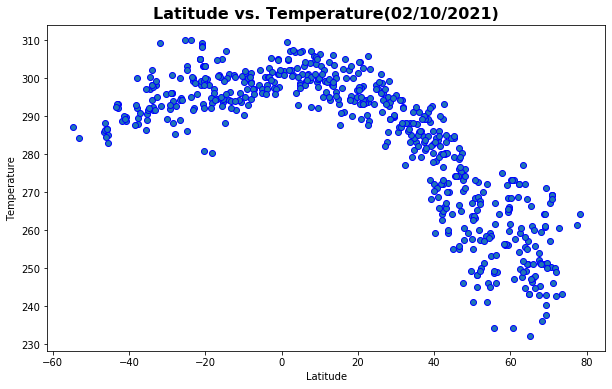

In [36]:
#Generate a scatter plot of Latitude vs. Temperature 
plt.figure(figsize=(10,6))
plt.scatter(city_weather['Lat'], city_weather['Max Temp'],edgecolors='b')

# Set a title for the chart
plt.title('Latitude vs. Temperature(02/10/2021)', fontweight='bold',fontsize = 16)
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')

# Save an image of our chart and print the final product to the screen
plt.savefig('../Output/lat_temp.png')
plt.show()

## Latitude vs. Humidity Plot

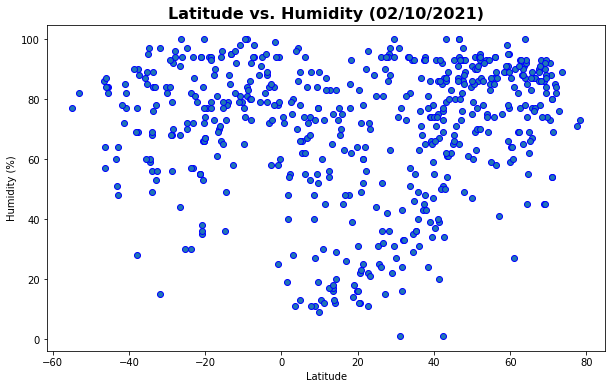

In [37]:
#Generate a scatter plot of Latitude vs. Humidity 
plt.figure(figsize=(10,6))
plt.scatter(city_weather['Lat'], city_weather['Humidity'],edgecolors='b')

# Set a title for the chart
plt.title('Latitude vs. Humidity (02/10/2021)', fontweight='bold',fontsize = 16)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Save an image of our chart and print the final product to the screen
plt.savefig('../Output/lat_humid.png')
plt.show()

## Latitude vs. Cloudiness Plot

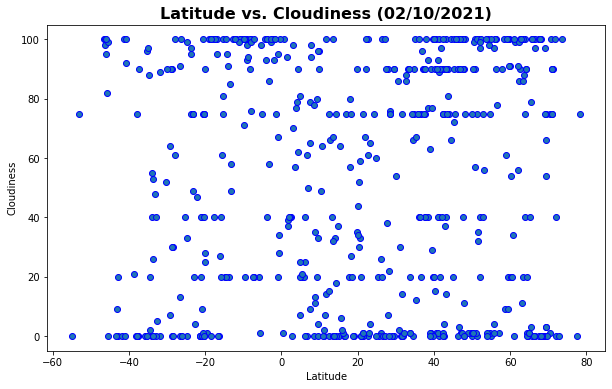

In [38]:
#Generate a scatter plot of Latitude vs. Cloudiness
plt.figure(figsize=(10,6))
plt.scatter(city_weather['Lat'], city_weather['Cloudiness'],edgecolors='b')

# Set a title for the chart
plt.title('Latitude vs. Cloudiness (02/10/2021)', fontweight='bold',fontsize = 16)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Save an image of our chart and print the final product to the screen
plt.savefig('../Output/lat_cloud.png')
plt.show()

## Latitude vs. Wind Speed Plot

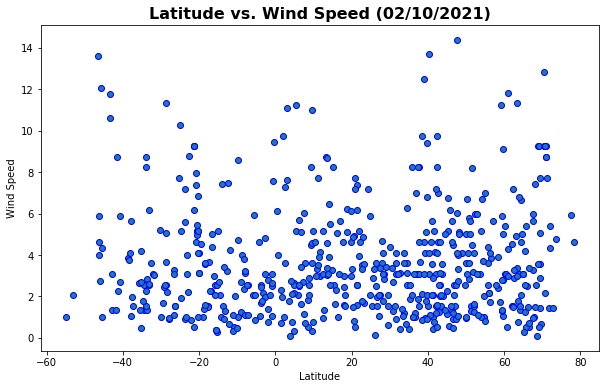

In [39]:
#Generate a scatter plot of Latitude vs. Humidity 
plt.figure(figsize=(10,6))
plt.scatter(city_weather['Lat'], city_weather['Windspeed'],edgecolors='b')

# Set a title for the chart
plt.title('Latitude vs. Wind Speed (02/10/2021)', fontweight='bold',fontsize = 16)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

# Save an image of our chart and print the final product to the screen
plt.savefig('../Output/lat_wind.png')
plt.show()

## Linear Regression

In [64]:
# Northern and Southern Hemispheres
northern_hemisphere = city_weather.loc[city_weather['Lat'] >= 0.0]
northern_hemisphere.reset_index(inplace=True)

southern_hemisphere = city_weather.loc[city_weather['Lat'] < 0.0]
southern_hemisphere.reset_index(inplace=True)


In [75]:
# Define Linear Regression Function
def linear_regression(x_value,y_value,xlabel,ylabel,label_pos,fig):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_value , y_value)
    # Print r value
    print(f'The r-value is: {rvalue**2}')
    regress_values = x_value * slope + intercept
    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Create Plot and annotate the line equation
    plt.scatter(x_value,y_value, edgecolors='b')
    plt.plot(x_value,regress_values,'r-')
    plt.annotate(line_eq,label_pos,fontsize=15,color='red')

    # Set a title for the chart
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    # Save an image of our chart and print the final product to the screen
    plt.savefig(f'../Output/linearregression{fig}.png')
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7929857364730244


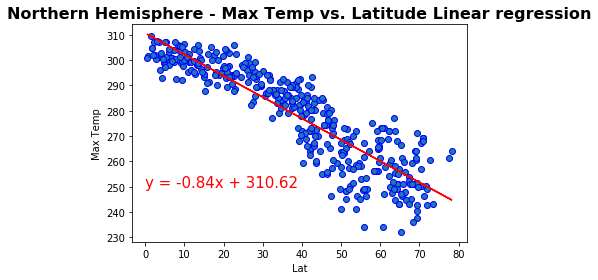

In [76]:
xlabel = 'Lat'
ylabel = 'Max Temp'
label_pos = (0,250)
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear regression', fontweight='bold',fontsize = 16)
linear_regression(northern_hemisphere[xlabel],northern_hemisphere[ylabel],xlabel,ylabel,label_pos,1)


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.25502713280709693


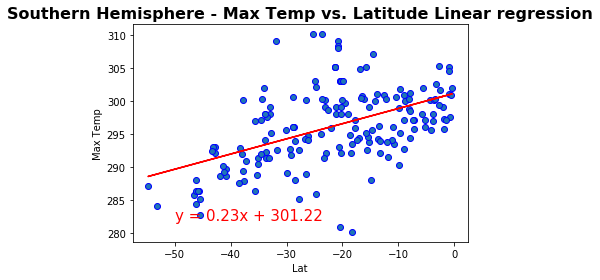

In [78]:
xlabel = 'Lat'
ylabel = 'Max Temp'
label_pos = (-50,282)
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear regression', fontweight='bold',fontsize = 16)
linear_regression(southern_hemisphere[xlabel],southern_hemisphere[ylabel],xlabel,ylabel,label_pos,2)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.17119475878949159


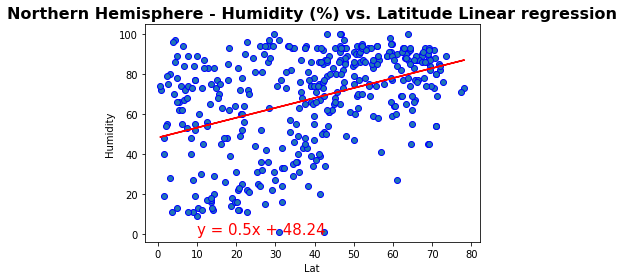

In [83]:
xlabel = 'Lat'
ylabel = 'Humidity'
label_pos = (10,0)
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear regression', fontweight='bold',fontsize = 16)
linear_regression(northern_hemisphere[xlabel],northern_hemisphere[ylabel],xlabel,ylabel,label_pos,3)


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.022744266779081087


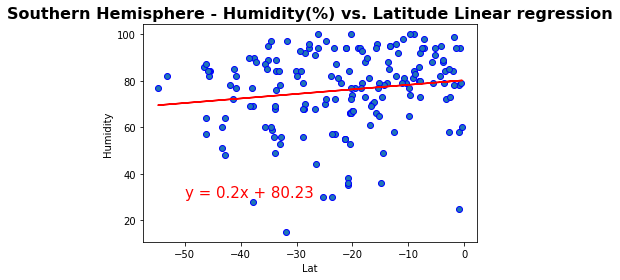

In [85]:
xlabel = 'Lat'
ylabel = 'Humidity'
label_pos = (-50,30)
plt.title('Southern Hemisphere - Humidity(%) vs. Latitude Linear regression', fontweight='bold',fontsize = 16)
linear_regression(southern_hemisphere[xlabel],southern_hemisphere[ylabel],xlabel,ylabel,label_pos,4)


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.02562806262383679


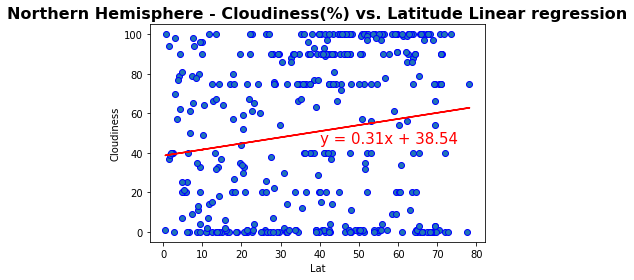

In [91]:
xlabel = 'Lat'
ylabel = 'Cloudiness'
label_pos = (40,45)
plt.title('Northern Hemisphere - Cloudiness(%) vs. Latitude Linear regression', fontweight='bold',fontsize = 16)
linear_regression(northern_hemisphere[xlabel],northern_hemisphere[ylabel],xlabel,ylabel,label_pos,5)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.09163002562129241


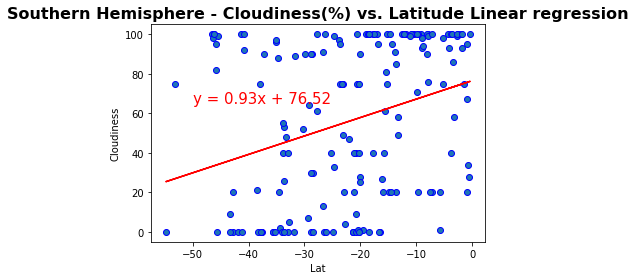

In [93]:
xlabel = 'Lat'
ylabel = 'Cloudiness'
label_pos = (-50,65)
plt.title('Southern Hemisphere - Cloudiness(%) vs. Latitude Linear regression', fontweight='bold',fontsize = 16)
linear_regression(southern_hemisphere[xlabel],southern_hemisphere[ylabel],xlabel,ylabel,label_pos,6)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.0023300773449435857


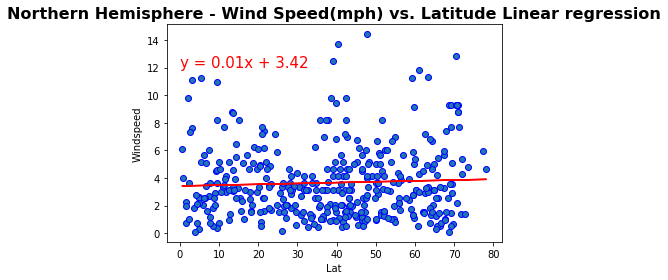

In [99]:
xlabel = 'Lat'
ylabel = 'Windspeed'
label_pos = (0,12)
plt.title('Northern Hemisphere - Wind Speed(mph) vs. Latitude Linear regression', fontweight='bold',fontsize = 16)
linear_regression(northern_hemisphere[xlabel],northern_hemisphere[ylabel],xlabel,ylabel,label_pos,7)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.038650299441754174


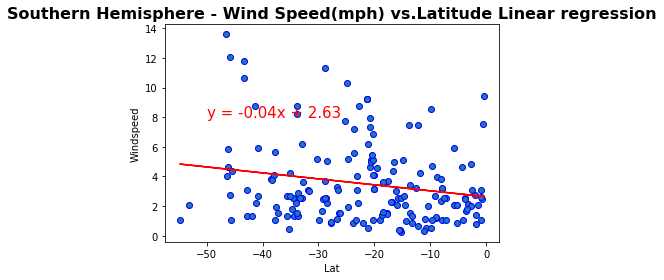

In [101]:
xlabel = 'Lat'
ylabel = 'Windspeed'
label_pos = (-50,8)
plt.title('Southern Hemisphere - Wind Speed(mph) vs.Latitude Linear regression', fontweight='bold',fontsize = 16)
linear_regression(southern_hemisphere[xlabel],southern_hemisphere[ylabel],xlabel,ylabel,label_pos,8)